In [1]:
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import manifold
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
%matplotlib nbagg
#%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

In [2]:
def get_path(person, number):
    filepath = os.path.join('s{}'.format(person), '{}.pgm'.format(number))
    return filepath

In [3]:
def load_image(filepath):
    im = Image.open(filepath)
    return im

<IPython.core.display.Javascript object>


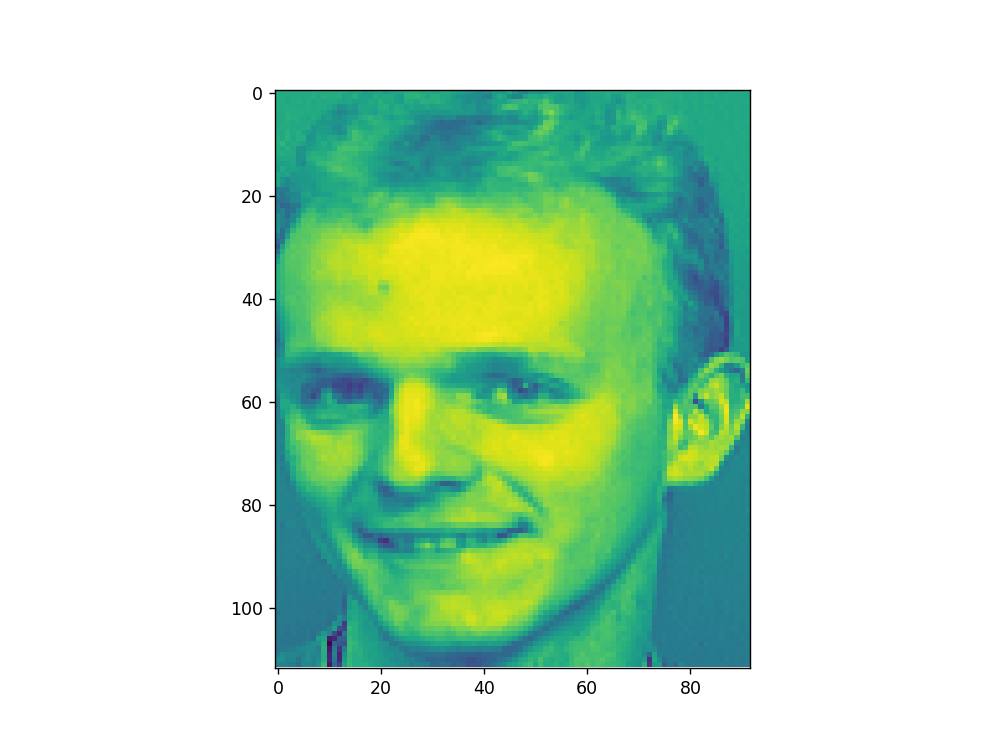

In [4]:
person = 5
number = 5
filepath = get_path(person, number)
im = load_image(filepath)
fig1, ax1 = plt.subplots(1,1)
ax1.imshow(np.asarray(im))

In [5]:
people = 41
numbers = 11
ims = np.empty((400,10304))
i = 0
for person in range(1, people):
    for number in range(1, numbers):
        filepath = get_path(person, number)
        im = load_image(filepath)
        im_pro = np.array(im).ravel().astype(float)
        ims[i] = im_pro
        i += 1

In [6]:
iso = manifold.Isomap(n_neighbors=2, n_components=3, max_iter=500)
Z = iso.fit_transform(ims)

<IPython.core.display.Javascript object>


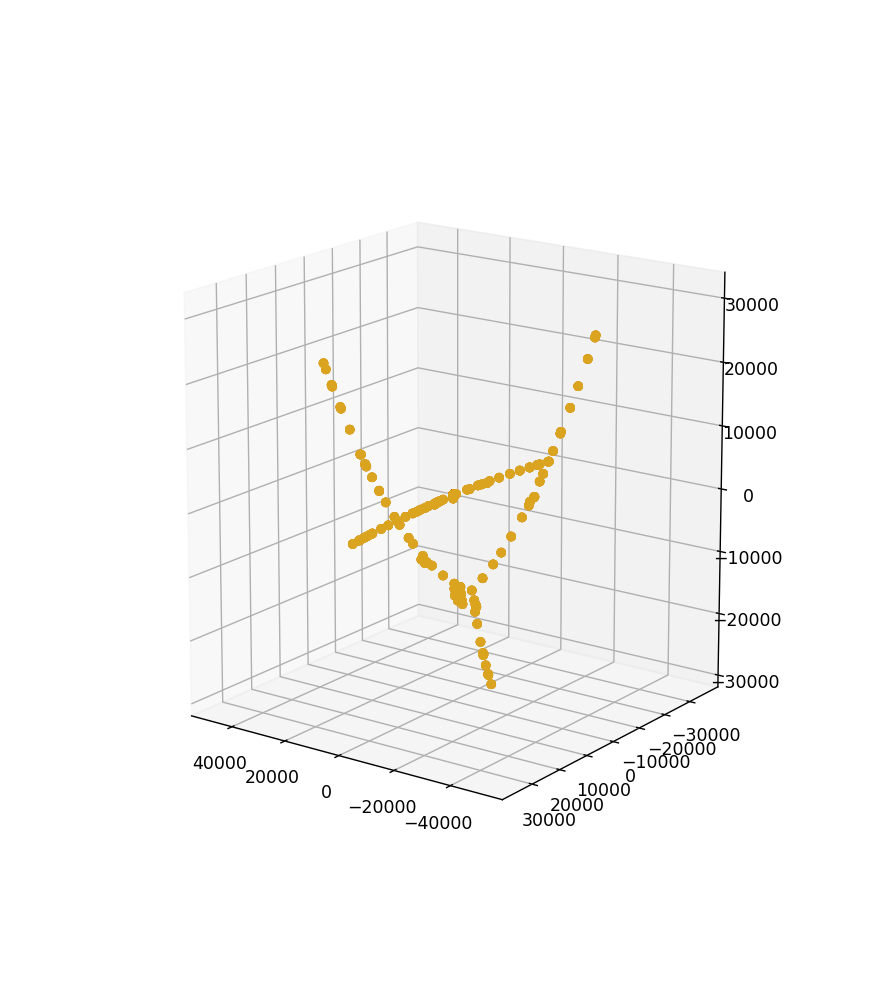

In [7]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c='r', cmap = plt.cm.Spectral);

In [8]:
def init():
    ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], marker='o', s=20, c="goldenrod", alpha=0.6)
    return fig,

In [9]:
def animate(i):
    ax.view_init(elev=15., azim=i)
    return fig,

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
plt.show()

In [11]:
lin = RandomForestRegressor()
lin.fit(Z, ims)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
lin.score(Z, ims)

0.82454463734566985

<IPython.core.display.Javascript object>


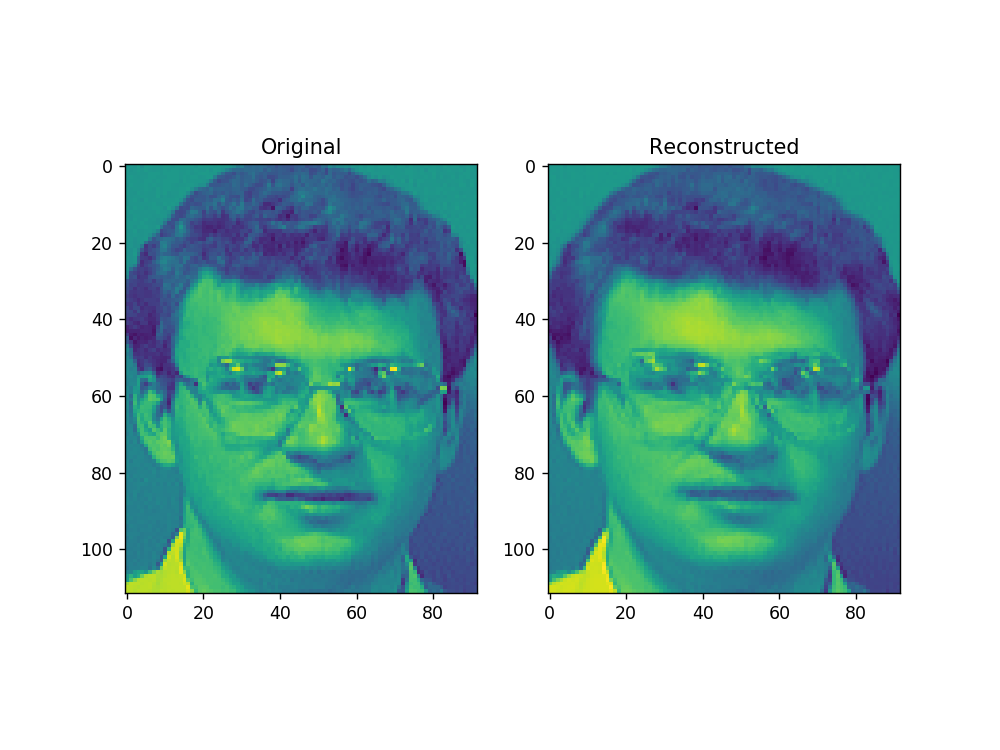

Text(0.5,1,'Reconstructed')

In [13]:
pred = lin.predict(Z[50].reshape(1, -1));
fig_new, [ax1,ax2] = plt.subplots(1,2)
ax1.imshow(ims[50].reshape((112,92)))
ax1.set_title('Original')
ax2.imshow(pred.reshape((112,92)))
ax2.set_title('Reconstructed')

<IPython.core.display.Javascript object>


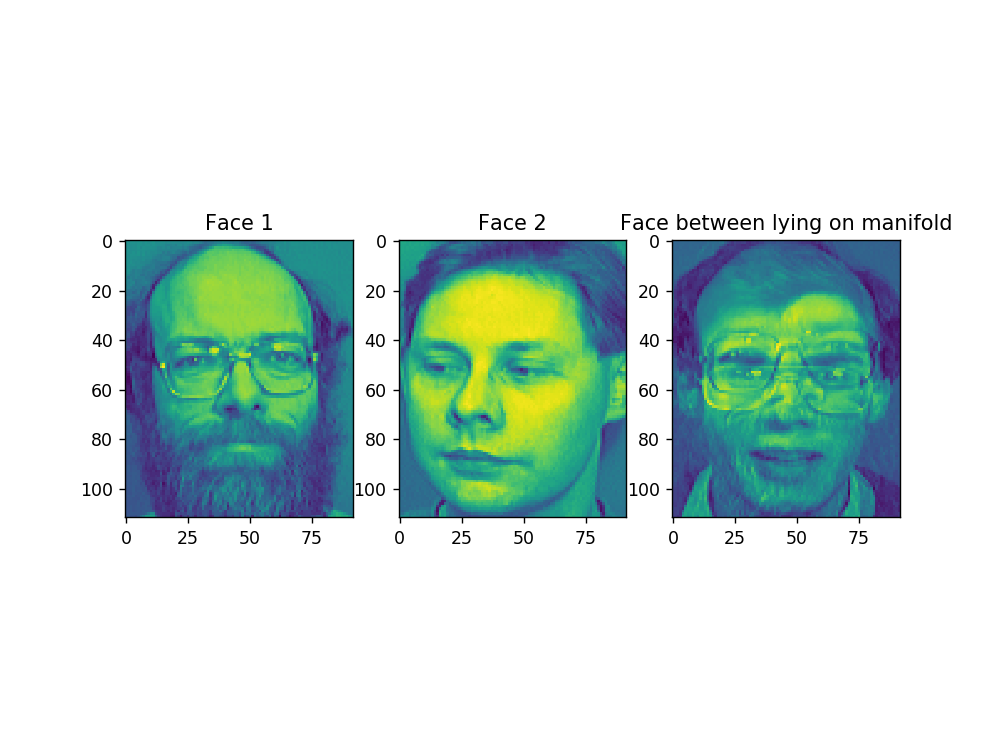

In [14]:
person1 = 360 #10
person2 = 35 #55
test = (Z[person1] + Z[person2]) / 2
pred = lin.predict(test.reshape(1, -1))
fig_newer, [ax1, ax2, ax3] = plt.subplots(1, 3)
ax1.imshow(ims[person1].reshape((112,92)))
ax1.set_title('Face 1')
ax2.imshow(ims[person2].reshape((112,92)))
ax2.set_title('Face 2')
ax3.imshow(pred.reshape((112,92)))
ax3.set_title('Face between lying on manifold');